In [32]:
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as wb
from finta import TA

import matplotlib.pyplot as plt

#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
import hvplot.pandas


# Context:

**Moving Averages**, when used in the appropriate way, can give:

     1) A True reading of market dirction
     2) A reading of market momentum
     3) Entry and Exit Signals
     4) Moving support and resistance points
     5) Target for a take profit


An exponential moving average, applies weighting factors which decrease exponentially. The weightings of old data points exponentially decrease giving much more importance to recent observations while still not discarding old observations entirely.The specific EMA's used in this study are the 5, 13, 50 and 200 period EMA's.
 
Crossovers of the EMA's can offer entry triggers or confirmation of entry triggers when viewed in the right context of the market.

## Signals
The 5 and 13 EMA's are the signal lines.

## Balance Line 
The 50 EMA is the balance line and shows the intraday trend

## Home base
The 200 EMA is the home base defining the longer term trend. Price always returns to home base. Note that the 200 EMA represents the 50 EMA on the next higher timeframe. So, if you are examining the 15 min chart, the 200 EMA represents the current trend on an hourly chart. In this way you can see the hourly trend on a 15 min chart. The 50 and 200 EMA's are used almost universally by institutions and are even reported in public announcements. Crossovers of these EMA's can be used as buy and sell signals. The 5 and 13 EMA's provide responsive signals. The context of the EMA's is important. If you are at the end of the trend, the EMA's will almost certainly be heading in the wrong direction. However, when a reversal occurs, the EMA crossover will follow and this will provide confirmation of the true direction that has been taken.

When the EMA's are spread out and the end of the trend can be identified, it is likely that the trend will be getting ready to collapse. The EMA's will follow rather than lead. Hence they are lagging indicators.


# TDI
(TRADERS DYNAMIC INDEX )

**The TDI is an improved version of the RSI and is really a hybrid of a number of different indicators. It incorporates a number of lines:**

1. A basic RSI line.
2. A trade signal line which provides entry signals when the RSI crossesover and this tends to be much earlier than would be possible if youwaited for the RSI to cross the midline.
3. A market baseline which replaces in many respects the usual midlineof the RSI except that it is a dynamic line and so the crossover alsooccurs earlier.
4. Volatility bands which are similar to a Bollinger band but applied tothe market baseline of the indicator instead of price.

**The volatility bands have a number of uses:**

1. They act as support and resistance lines based on the close which ismuch stronger 
2. When the bands re-contain the RSI line after breakout, it is a sign of weakening and an impending reversal. This represents a stop hunt.
3. When viewed in the proper context, they can identify stop hunts,entries and exits

**Specific use of this indicator identifies the following indicator patterns which, when looked at in the context of price action, provide an even more accurate means of triggering trades. The patterns are:**

1. Shark Fin Short.

**Look for the following features:**

- If RSI reaches an overbought state and the price action is in agreement this can be an ideal place to sell.
- The RSI line will then cross back below the signal line so that it looks like a shark fin. Entering the trade at this point would still be valid.
- The RSI then crosses the signal line. Entering a trade at this point would still be valid.
- Note that these secondary places for entry would also represent potential places for adding to your position.
- As the trade progresses, you would normally be trying to identify the count from the price data. However you get further confirmation of this when you review the shape/pattern of the RSI in its journey back to the other side of the volatility bands.
- An exit is suggested when the RSI gets to the opposite volatility band and recrosses the Signal line again. Again, this is only valid when it is occurring at the correct place. If it occurs during the consolidation phase for instance, it is meaningless. 

2. Shark Fin Long.

Is the same as the Shark Fin Short, but upside down

In [61]:
# Initiate start and end times
start = dt.datetime(2000,1,1)
end = dt.datetime(2023,12,31)

# Bring in data
df = wb.DataReader("AAPL", "yahoo", start, end)

# Set up the 5,13,50,200 emas.
df['5ema'] = df["Adj Close"].ewm(span=5).mean()
df['13ema'] = df["Adj Close"].ewm(span=13).mean()
df['50ema'] = df["Adj Close"].ewm(span=50).mean()
df['200ema'] = df["Adj Close"].ewm(span=100).mean()

# Set up the Relative Stength Index Oscillator
df['RSI'] = TA.RSI(df)

# Set up the standard deviation to be used as a "Bollinger Band" on the RSI
df['STD'] = df['Close'].rolling(window=20, min_periods=0).std(ddof = 0)

# Clean data, remove NAs
df.dropna(inplace=True)
df

High         Low        Open       Close       Volume  \
Date                                                                      
2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
2000-01-10    0.912946    0.845982    0.910714    0.872768  505064000.0   
...                ...         ...         ...         ...          ...   
2022-08-01  163.589996  160.889999  161.009995  161.509995   67829400.0   
2022-08-02  162.410004  159.630005  160.100006  160.009995   59907000.0   
2022-08-03  166.589996  160.750000  160.839996  166.130005   82507500.0   
2022-08-04  167.190002  164.429993  166.009995  165.809998   55474100.0   
2022-08-05  165.850006  163.000000  163.210007  165.350006   56646600.0   

             Adj Close        5ema       13ema       50ema      200ema  \
Date                                                                     
2000-01-04    0.781409    0.810188    0.814615    0.816663    0.817023   
2000-01-05    0.792843    0.801972    0.806215    0.808403    0.808801   
2000-01-06    0.724232    0.769680    0.780767    0.786081    0.787020   
2000-01-07    0.758538    0.765403    0.774857    0.780124    0.781094   
2000-01-10    0.745197    0.758019    0.767835    0.773705    0.774808   
...                ...         ...         ...         ...         ...   
2022-08-01  161.285965  158.617290  154.237311  149.035099  151.570090   
2022-08-02  159.788040  159.007540  155.030272  149.456783  151.732821   
2022-08-03  165.899567  161.304882  156.583028  150.101598  152.013351   
2022-08-04  165.580002  162.729922  157.868310  150.708595  152.281997   
2022-08-05  165.350006  163.603283  158.937124  151.282768  152.540770   

                  RSI       STD  
Date                             
2000-01-04   0.000000  0.042131  
2000-01-05  14.614288  0.036972  
2000-01-06   7.516212  0.053685  
2000-01-07  26.689246  0.049957  
2000-01-10  24.557141  0.048361  
...               ...       ...  
2022-08-01  68.059010  5.750533  
2022-08-02  64.915141  5.673700  
2022-08-03  70.834717  6.111455  
2022-08-04  70.168059  6.528820  
2022-08-05  69.160457  6.787560  

[5684 rows x 12 columns]

In [72]:
# Set up a DF with 'Close', '5ema', '13ema', '50ema', '200ema', 'RSI', 'STD' 
refined_df = df[['Close', '5ema', '13ema', '50ema', '200ema', 'RSI', 'STD']]
refined_df

Close        5ema       13ema       50ema      200ema  \
Date                                                                     
2000-01-04    0.915179    0.810188    0.814615    0.816663    0.817023   
2000-01-05    0.928571    0.801972    0.806215    0.808403    0.808801   
2000-01-06    0.848214    0.769680    0.780767    0.786081    0.787020   
2000-01-07    0.888393    0.765403    0.774857    0.780124    0.781094   
2000-01-10    0.872768    0.758019    0.767835    0.773705    0.774808   
...                ...         ...         ...         ...         ...   
2022-08-01  161.509995  158.617290  154.237311  149.035099  151.570090   
2022-08-02  160.009995  159.007540  155.030272  149.456783  151.732821   
2022-08-03  166.130005  161.304882  156.583028  150.101598  152.013351   
2022-08-04  165.809998  162.729922  157.868310  150.708595  152.281997   
2022-08-05  165.350006  163.603283  158.937124  151.282768  152.540770   

                  RSI       STD  
Date                             
2000-01-04   0.000000  0.042131  
2000-01-05  14.614288  0.036972  
2000-01-06   7.516212  0.053685  
2000-01-07  26.689246  0.049957  
2000-01-10  24.557141  0.048361  
...               ...       ...  
2022-08-01  68.059010  5.750533  
2022-08-02  64.915141  5.673700  
2022-08-03  70.834717  6.111455  
2022-08-04  70.168059  6.528820  
2022-08-05  69.160457  6.787560  

[5684 rows x 7 columns]

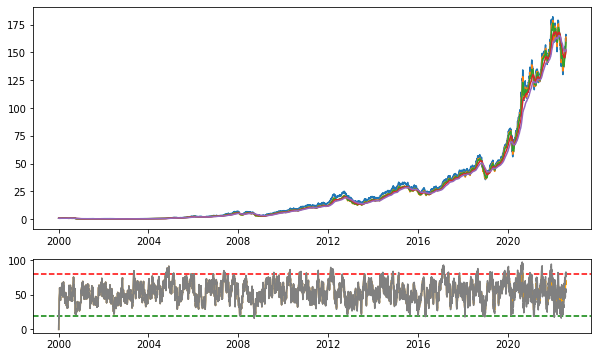

In [98]:
fig,axs = plt.subplots(2,1, gridspec_kw = {"height_ratios": [3,1]}, figsize = (10,6))



axs[0].plot(refined_df[['Close', '5ema', '13ema', '50ema', '200ema']])
axs[1].axhline(y=80,color="r", linestyle = "--")
axs[1].axhline(y=20,color="g", linestyle = "--")
axs[1].plot(refined_df.RSI, color = "orange")
axs[1].plot((refined_df["RSI"] + (refined_df['STD'] * 2)), color = "grey")
axs[1].plot((refined_df["RSI"] - (refined_df['STD'] * 2)), color = "grey")


### Signal 1

In [64]:
#Logic : if 5 EMA is over the 13 EMA look for buying opportunities,
# otherwise look for selling opportunities.


# signal_1 = list(df['5ema'] > df['13ema'])
# signal_1 = ['Buy' if i == True else "Sell" for i in signal_1 ]
# refined_df['5/13ema Cross Over'] = signal_1
# refined_df

signal_1 = list(df['5ema'] > df['13ema'])
signal_1 = ['Buy' if i == True else "Sell" for i in signal_1 ]
df['5/13ema Cross Over'] = signal_1
df

High         Low        Open       Close       Volume  \
Date                                                                      
2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
2000-01-10    0.912946    0.845982    0.910714    0.872768  505064000.0   
...                ...         ...         ...         ...          ...   
2022-08-01  163.589996  160.889999  161.009995  161.509995   67829400.0   
2022-08-02  162.410004  159.630005  160.100006  160.009995   59907000.0   
2022-08-03  166.589996  160.750000  160.839996  166.130005   82507500.0   
2022-08-04  167.190002  164.429993  166.009995  165.809998   55474100.0   
2022-08-05  165.850006  163.000000  163.210007  165.350006   56646600.0   

             Adj Close        5ema       13ema       50ema      200ema  \
Date                                                                     
2000-01-04    0.781409    0.810188    0.814615    0.816663    0.817023   
2000-01-05    0.792843    0.801972    0.806215    0.808403    0.808801   
2000-01-06    0.724232    0.769680    0.780767    0.786081    0.787020   
2000-01-07    0.758538    0.765403    0.774857    0.780124    0.781094   
2000-01-10    0.745197    0.758019    0.767835    0.773705    0.774808   
...                ...         ...         ...         ...         ...   
2022-08-01  161.285965  158.617290  154.237311  149.035099  151.570090   
2022-08-02  159.788040  159.007540  155.030272  149.456783  151.732821   
2022-08-03  165.899567  161.304882  156.583028  150.101598  152.013351   
2022-08-04  165.580002  162.729922  157.868310  150.708595  152.281997   
2022-08-05  165.350006  163.603283  158.937124  151.282768  152.540770   

                  RSI       STD 5/13ema Cross Over  
Date                                                
2000-01-04   0.000000  0.042131               Sell  
2000-01-05  14.614288  0.036972               Sell  
2000-01-06   7.516212  0.053685               Sell  
2000-01-07  26.689246  0.049957               Sell  
2000-01-10  24.557141  0.048361               Sell  
...               ...       ...                ...  
2022-08-01  68.059010  5.750533                Buy  
2022-08-02  64.915141  5.673700                Buy  
2022-08-03  70.834717  6.111455                Buy  
2022-08-04  70.168059  6.528820                Buy  
2022-08-05  69.160457  6.787560                Buy  

[5684 rows x 13 columns]

### Signal 2

In [35]:
#Logic : if close is above the 50 EMA look for buying opportunities,
# otherwise look for selling opportunities.


# signal_2 = list(df['Close'] > df['50ema'])
# signal_2 = ['Buy' if i == True else "Sell" for i in signal_2 ]
# refined_df['Price_Over_50ema'] = signal_2
# refined_df

signal_2 = list(df['Close'] > df['50ema'])
signal_2 = ['Buy' if i == True else "Sell" for i in signal_2 ]
df['Price_Over_50ema'] = signal_2
df

High         Low        Open       Close       Volume  \
Date                                                                      
2000-01-03    1.004464    0.907924    0.936384    0.999442  535796800.0   
2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
...                ...         ...         ...         ...          ...   
2022-08-01  163.589996  160.889999  161.009995  161.509995   67829400.0   
2022-08-02  162.410004  159.630005  160.100006  160.009995   59907000.0   
2022-08-03  166.589996  160.750000  160.839996  166.130005   82507500.0   
2022-08-04  167.190002  164.429993  166.009995  165.809998   55474100.0   
2022-08-05  165.850006  163.000000  163.210007  165.350006   56646600.0   

             Adj Close        5ema       13ema       50ema      200ema  \
Date                                                                     
2000-01-03    0.854541    0.854541    0.854541    0.854541    0.854541   
2000-01-04    0.782494    0.811313    0.815747    0.817797    0.818157   
2000-01-05    0.793945    0.803086    0.807335    0.809526    0.809925   
2000-01-06    0.725238    0.770749    0.781852    0.787173    0.788114   
2000-01-07    0.759592    0.766466    0.775934    0.781207    0.782179   
...                ...         ...         ...         ...         ...   
2022-08-01  161.509995  158.837614  154.451552  149.242116  151.780627   
2022-08-02  160.009995  159.228408  155.245615  149.664386  151.943585   
2022-08-03  166.130005  161.528940  156.800528  150.310096  152.224504   
2022-08-04  165.809998  162.955959  158.087595  150.917935  152.493524   
2022-08-05  165.350006  163.753975  159.125082  151.483899  152.748108   

           5/13ema Cross Over Price_Over_50ema  
Date                                            
2000-01-03               Sell              Buy  
2000-01-04               Sell              Buy  
2000-01-05               Sell              Buy  
2000-01-06               Sell              Buy  
2000-01-07               Sell              Buy  
...                       ...              ...  
2022-08-01                Buy              Buy  
2022-08-02                Buy              Buy  
2022-08-03                Buy              Buy  
2022-08-04                Buy              Buy  
2022-08-05                Buy              Buy  

[5685 rows x 12 columns]

### Signal 3

In [36]:
#Logic : Golden Cross - if 50 EMA is above the 200 EMA look for buying opportunities,
# otherwise look for selling opportunities.

# signal_3 = list(df['50ema'] > df['200ema'])
# signal_3 = ['Buy' if i == True else "Sell" for i in signal_3 ]
# refined_df['Golden Cross'] = signal_3
# refined_df

signal_3 = list(df['50ema'] > df['200ema'])
signal_3 = ['Buy' if i == True else "Sell" for i in signal_3 ]
df['Golden Cross'] = signal_3
df

High         Low        Open       Close       Volume  \
Date                                                                      
2000-01-03    1.004464    0.907924    0.936384    0.999442  535796800.0   
2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
...                ...         ...         ...         ...          ...   
2022-08-01  163.589996  160.889999  161.009995  161.509995   67829400.0   
2022-08-02  162.410004  159.630005  160.100006  160.009995   59907000.0   
2022-08-03  166.589996  160.750000  160.839996  166.130005   82507500.0   
2022-08-04  167.190002  164.429993  166.009995  165.809998   55474100.0   
2022-08-05  165.850006  163.000000  163.210007  165.350006   56646600.0   

             Adj Close        5ema       13ema       50ema      200ema  \
Date                                                                     
2000-01-03    0.854541    0.854541    0.854541    0.854541    0.854541   
2000-01-04    0.782494    0.811313    0.815747    0.817797    0.818157   
2000-01-05    0.793945    0.803086    0.807335    0.809526    0.809925   
2000-01-06    0.725238    0.770749    0.781852    0.787173    0.788114   
2000-01-07    0.759592    0.766466    0.775934    0.781207    0.782179   
...                ...         ...         ...         ...         ...   
2022-08-01  161.509995  158.837614  154.451552  149.242116  151.780627   
2022-08-02  160.009995  159.228408  155.245615  149.664386  151.943585   
2022-08-03  166.130005  161.528940  156.800528  150.310096  152.224504   
2022-08-04  165.809998  162.955959  158.087595  150.917935  152.493524   
2022-08-05  165.350006  163.753975  159.125082  151.483899  152.748108   

           5/13ema Cross Over Price_Over_50ema Golden Cross  
Date                                                         
2000-01-03               Sell              Buy         Sell  
2000-01-04               Sell              Buy         Sell  
2000-01-05               Sell              Buy         Sell  
2000-01-06               Sell              Buy         Sell  
2000-01-07               Sell              Buy         Sell  
...                       ...              ...          ...  
2022-08-01                Buy              Buy         Sell  
2022-08-02                Buy              Buy         Sell  
2022-08-03                Buy              Buy         Sell  
2022-08-04                Buy              Buy         Sell  
2022-08-05                Buy              Buy         Sell  

[5685 rows x 13 columns]

### Signal 4

In [37]:
#Logic : if close is above the 200 EMA look for buying opportunities,
# otherwise look for selling opportunities.

# signal_4 = list(df['Close'] > df['200ema'])
# signal_4 = ['Buy' if i == True else "Sell" for i in signal_4 ]
# refined_df['Price_Over_200ema'] = signal_4
# refined_df

signal_4 = list(df['Close'] > df['200ema'])
signal_4 = ['Buy' if i == True else "Sell" for i in signal_4 ]
df['Price_Over_200ema'] = signal_4
df

High         Low        Open       Close       Volume  \
Date                                                                      
2000-01-03    1.004464    0.907924    0.936384    0.999442  535796800.0   
2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
...                ...         ...         ...         ...          ...   
2022-08-01  163.589996  160.889999  161.009995  161.509995   67829400.0   
2022-08-02  162.410004  159.630005  160.100006  160.009995   59907000.0   
2022-08-03  166.589996  160.750000  160.839996  166.130005   82507500.0   
2022-08-04  167.190002  164.429993  166.009995  165.809998   55474100.0   
2022-08-05  165.850006  163.000000  163.210007  165.350006   56646600.0   

             Adj Close        5ema       13ema       50ema      200ema  \
Date                                                                     
2000-01-03    0.854541    0.854541    0.854541    0.854541    0.854541   
2000-01-04    0.782494    0.811313    0.815747    0.817797    0.818157   
2000-01-05    0.793945    0.803086    0.807335    0.809526    0.809925   
2000-01-06    0.725238    0.770749    0.781852    0.787173    0.788114   
2000-01-07    0.759592    0.766466    0.775934    0.781207    0.782179   
...                ...         ...         ...         ...         ...   
2022-08-01  161.509995  158.837614  154.451552  149.242116  151.780627   
2022-08-02  160.009995  159.228408  155.245615  149.664386  151.943585   
2022-08-03  166.130005  161.528940  156.800528  150.310096  152.224504   
2022-08-04  165.809998  162.955959  158.087595  150.917935  152.493524   
2022-08-05  165.350006  163.753975  159.125082  151.483899  152.748108   

           5/13ema Cross Over Price_Over_50ema Golden Cross Price_Over_200ema  
Date                                                                           
2000-01-03               Sell              Buy         Sell               Buy  
2000-01-04               Sell              Buy         Sell               Buy  
2000-01-05               Sell              Buy         Sell               Buy  
2000-01-06               Sell              Buy         Sell               Buy  
2000-01-07               Sell              Buy         Sell               Buy  
...                       ...              ...          ...               ...  
2022-08-01                Buy              Buy         Sell               Buy  
2022-08-02                Buy              Buy         Sell               Buy  
2022-08-03                Buy              Buy         Sell               Buy  
2022-08-04                Buy              Buy         Sell               Buy  
2022-08-05                Buy              Buy         Sell               Buy  

[5685 rows x 14 columns]

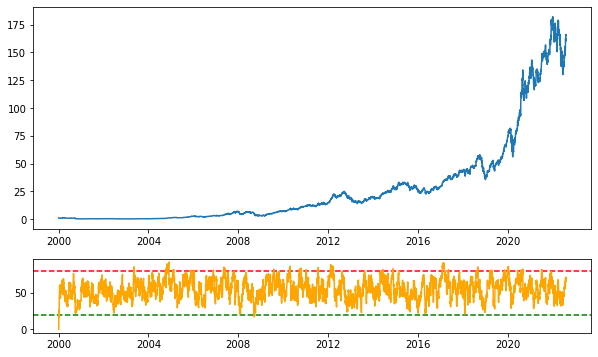

In [38]:
fig,axs = plt.subplots(2,1, gridspec_kw = {"height_ratios": [3,1]}, figsize = (10,6))

axs[0].plot(df.Close)
axs[1].axhline(y=80,color="r", linestyle = "--")
axs[1].axhline(y=20,color="g", linestyle = "--")
axs[1].plot(refined_df.RSI, color = "orange")

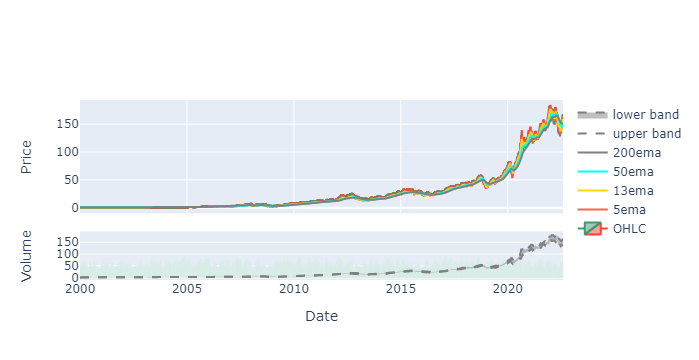

In [57]:
# set fig

fig = make_subplots(
        rows = 2,
        cols = 1,
        shared_xaxes = True,
        vertical_spacing = 0.10,
        # subplot_titles = (df, 'Volume'),
        row_width = [0.3, 0.7]
    )


# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index, 
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"],
    name="OHLC"),
              row=1,
              col=1)


# 5 period moving average
fig.add_trace(go.Scatter(x=df.index, y=df["5ema"], marker_color='tomato',name="5ema"), row=1, col=1)
# 13 period moving average
fig.add_trace(go.Scatter(x=df.index, y=df["13ema"], marker_color='gold',name="13ema"), row=1, col=1)
# 50 period moving average
fig.add_trace(go.Scatter(x=df.index, y=df["50ema"], marker_color='aqua',name="50ema"), row=1, col=1)
# 200 period moving average
fig.add_trace(go.Scatter(x=df.index, y=df["200ema"], marker_color='grey',name="200ema"), row=1, col=1)


# RSI
fig.add_trace(go.Bar(x=df.index, y=df['RSI'], marker_color='lime', showlegend=False), row=2, col=1)


# Create a Bollinger Band
df['std'] = df['Close'].rolling(window=20, min_periods=0).std(ddof = 0)

# Upper Bound
fig.add_trace(go.Scatter(x=df.index, 
                         y=df["50ema"] + (df['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 2, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=df.index, 
                         y=df["50ema"] - (df['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 2, col = 1)


fig['layout']['xaxis2']['title'] = 'Date'
fig['layout']['yaxis']['title'] = 'Price'
fig['layout']['yaxis2']['title'] = 'Volume'

fig.update_xaxes(
    rangebreaks = [{'bounds': ['sat', 'mon']}],
    rangeslider_visible = False,
    )



fig.show()